# Análisis de imágenes de peces

El presente trabajo tiene por objetivo analizar imágenes de peces para poder detectar a través de su forma, con imágenes extraídas de video, la presencia en jaulas de especies salvajes, que pueden traer consecuencias como el desequilibrio, estrés de cultivo, y la interacción de las mismas pueden afectar al balance y traer consecuencias negativas.

In [49]:
from skimage import data, io, filters
import matplotlib.pyplot as plt
import os
from skimage.color import rgb2hsv
from skimage.color import rgb2gray
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi
from skimage.data import camera
from skimage.util import compare_images
from skimage import filters
from skimage import feature
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from skimage import data, img_as_float
from skimage import exposure

In [10]:
# Definición de datos
salmon1 = io.imread('truchas/salmonid.000004.png')
salmon2 = io.imread('truchas/salmonid.000005.png')
salmon3 = io.imread('truchas/salmonid.000006.png')
salmon4 = io.imread('truchas/salmonid.000009.png')

## Dataset

Origen público. NorkFisk v1.0

## Número de imágenes

In [19]:
directory_path = 'truchas/'
No_of_files = len(os.listdir(directory_path))
print('Se tiene la siguiente cantidad de imágenes: ', No_of_files)

Se tiene la siguiente cantidad de imágenes:  9487


## Visualización de imágenes

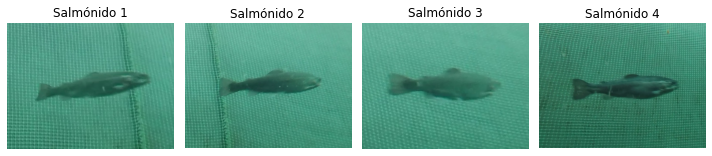

In [27]:
# Mostrando imágenes
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(10, 5))

ax0.imshow(salmon1)
ax0.set_title("Salmónido 1")
ax0.axis('off')
ax1.imshow(salmon2)
ax1.set_title("Salmónido 2")
ax1.axis('off')
ax2.imshow(salmon3)
ax2.set_title("Salmónido 3")
ax2.axis('off')
ax3.imshow(salmon4)
ax3.set_title("Salmónido 4")
ax3.axis('off')

fig.tight_layout()

## RGB a HSV

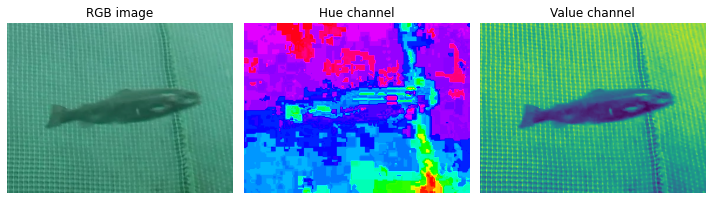

In [32]:
rgb_img = salmon1
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(10, 5))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

## RGB a escala de grises

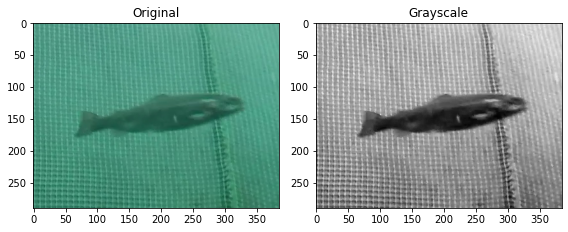

In [35]:
original = salmon1
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

## Equalización de Histograma

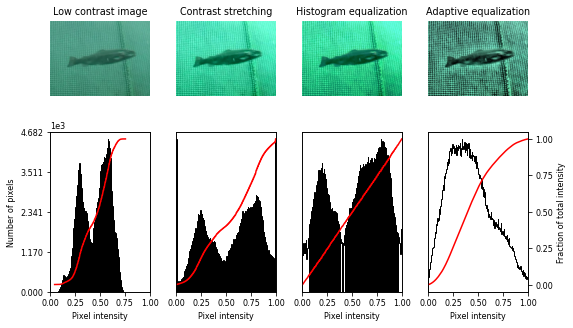

In [38]:
matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = salmon1

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

## Ajuste de contraste

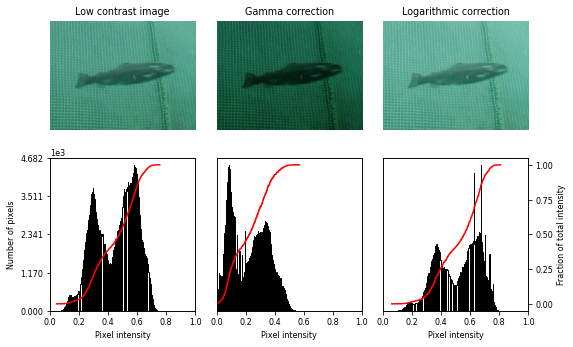

In [39]:
matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = salmon1

# Gamma
gamma_corrected = exposure.adjust_gamma(img, 2)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 1)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

## Umbral de histéresis

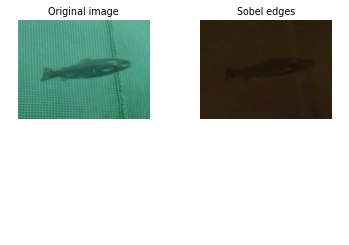

<Figure size 576x288 with 0 Axes>

In [58]:
fig, ax = plt.subplots(nrows=2, ncols=2)

image = salmon1
edges = filters.sobel(image)

low = 0.01
high = 0.05

lowt = (edges > low).astype(int)
hight = (edges > high).astype(int)
hyst = filters.apply_hysteresis_threshold(edges, low, high)

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(edges, cmap='magma')
ax[0, 1].set_title('Sobel edges')

fig = plt.figure(figsize=(8, 4))

for a in ax.ravel():
    a.axis('off')



plt.show()

## Informe N°2

Para el procesamiento y análisis de imágenes propuesto, se busca desarrollar una metodología de procesamiento de imágenes estándar, que contiene tres componentes básicos: una etapa de procesamiento de imágenes, una etapa de extracción de características de la imagen, y finalmente, una etapa de análisis de la red neuronal.

Image Split HSV

Durante esta etapa se divide la imagen en los tres canales HSV respectivos (Hue-Saturation-Value)

In [ ]:
import numpy as np
import cv2
image = cv2.imread('truchas/salmonid.000004.png', 1)
b,g,r = cv2.split(img)
cv2.imshow('image', image)
cv2.waitKey(0)